In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
# os.getcwd()

In [2]:
df = pd.DataFrame()
for i in range(11):
    file_path = './Data/'
    file_name = 'pecan_1_min_part'+str(i+1)+'.csv'
    tmp = pd.read_csv(file_path+file_name)
    df = pd.concat([df,tmp])

In [3]:
print(df.shape)  # size of the dataset
print(min(df.localminute),max(df.localminute))  # time range of the dataset
df.head()

(49443400, 3)
2016-01-01 00:00:00-06 2016-04-30 05:59:00-05


,localminute,dataid,use
0,2016-01-01 00:00:00-06,26,0.519
1,2016-01-01 00:00:00-06,59,1.176
2,2016-01-01 00:00:00-06,86,0.469
3,2016-01-01 00:00:00-06,114,1.006
4,2016-01-01 00:00:00-06,370,0.519


later check for eletricity at US federal holiday: 
* January 1, 2016	New Year's Day	Friday
* January 18, 2016	Martin Luther King Day	Monday
* February 15, 2016	Presidents' Day*	Monday

In [4]:
# unique number of users
df['dataid'].nunique()

346

In [5]:
# granularity of the time: 1 minute
df['localminute'][:100].unique()

array(['2016-01-01 00:00:00-06', '2016-01-01 00:01:00-06',
       '2016-01-01 00:02:00-06', '2016-01-01 00:03:00-06',
       '2016-01-01 00:04:00-06', '2016-01-01 00:05:00-06',
       '2016-01-01 00:06:00-06', '2016-01-01 00:07:00-06'], dtype=object)

In [9]:
# caution: this cell runs for a long time
df['time'] = df['localminute'].apply(lambda x:datetime.strptime(x[:13],"%Y-%m-%d %H"))

In [11]:
df = df.drop('localminute',axis=1)
df

,dataid,use,time
0,26,0.519,2016-01-01 00:00:00
1,59,1.176,2016-01-01 00:00:00
2,86,0.469,2016-01-01 00:00:00
3,114,1.006,2016-01-01 00:00:00
4,370,0.519,2016-01-01 00:00:00
...,...,...,...
7683238,9235,0.309,2016-03-04 01:00:00
7683239,9654,0.202,2016-03-04 01:00:00
7683240,8317,0.634,2016-03-04 01:00:00
7683241,9134,0.884,2016-03-04 01:00:00


## convert datatype to reduce memory

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49443400 entries, 0 to 7683242
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   dataid  int64         
 1   use     float64       
 2   time    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 GB


In [14]:
df['dataid'] = df['dataid'].astype('int16')
df['use'] = df['use'].astype('float16')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49443400 entries, 0 to 7683242
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   dataid  int16         
 1   use     float16       
 2   time    datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int16(1)
memory usage: 943.1 MB


In [15]:
print(df.dataid.nunique())

346


## number of data entries for each user

In [16]:
# number of data per user
num_data_id = df['dataid'].value_counts()
num_data_id

434     173100
4874    173100
1524    173100
1551    173100
2199    173100
         ...  
3734     86400
1796     85680
9295     46520
9333      4760
9836      4760
Name: dataid, Length: 346, dtype: int64

<AxesSubplot: xlabel='dataid', ylabel='Count'>

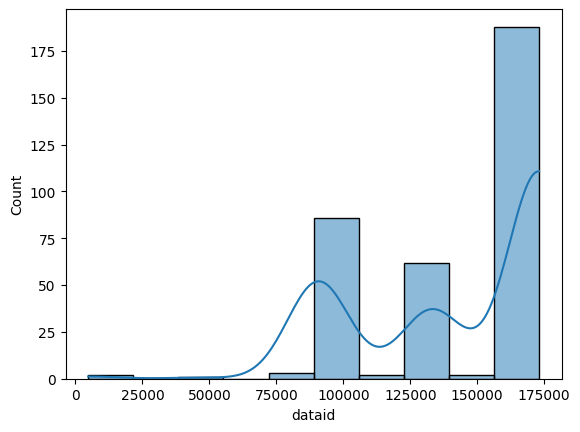

In [17]:
# plot distribution
sns.histplot(num_data_id,kde=True)

In [18]:
# delete those with too few data
del_id = num_data_id.index[num_data_id<50000].tolist()
del_id

[9295, 9333, 9836]

In [19]:
df = df[(df.dataid != 9295)&(df.dataid != 9333)&(df.dataid != 9836)]
df['dataid'].value_counts()  # 346-3

4703    173100
483     173100
3368    173100
3723    173100
1524    173100
         ...  
9771     90800
6191     89137
3092     86928
3734     86400
1796     85680
Name: dataid, Length: 343, dtype: int64

## convert the data into hourly data

In [20]:
# create time index that span from 2016-01-01 00 to 2016-04-30 05
time_idx = pd.date_range(start="2016-01-01 00:00:00",end="2016-04-30 05:00:00",freq='60min').to_pydatetime().tolist()
time_idx[-1] 

datetime.datetime(2016, 4, 30, 5, 0)

In [21]:
hourly_data = pd.DataFrame(index = time_idx)
hourly_data

""
2016-01-01 00:00:00
2016-01-01 01:00:00
2016-01-01 02:00:00
2016-01-01 03:00:00
2016-01-01 04:00:00
...
2016-04-30 01:00:00
2016-04-30 02:00:00
2016-04-30 03:00:00
2016-04-30 04:00:00


In [22]:
user_id = df.dataid.unique()
for user in user_id:
    user_hourly_data = df[df.dataid == user].groupby('time')[['use']].sum()
    user_hourly_data = user_hourly_data.rename(columns={'use':str(user)})
    hourly_data = pd.merge(hourly_data,user_hourly_data,how='left',left_index=True,right_index=True)
# hourly_data.columns = user_id
hourly_data #row index: time interval by hour. column index: user id

,26,59,86,114,370,379,115,77,93,171,...,8218,9343,8395,9160,8419,9937,8555,9434,9912,9771
2016-01-01 00:00:00,31.625000,151.875000,30.015625,50.562500,33.87500,240.000,8.664062,32.437500,35.687500,27.656250,...,19.359375,34.40625,21.484375,38.500000,126.9375,17.328125,31.375000,26.984375,21.515625,253.1250
2016-01-01 01:00:00,27.781250,168.125000,32.656250,42.312500,34.93750,174.375,12.648438,25.593750,28.890625,23.703125,...,22.031250,36.53125,25.968750,23.656250,93.8125,16.921875,29.890625,18.828125,18.937500,140.7500
2016-01-01 02:00:00,29.812500,142.375000,30.078125,41.250000,33.90625,119.375,7.359375,26.609375,19.859375,22.656250,...,25.265625,35.40625,22.218750,18.265625,114.5000,19.078125,27.718750,18.750000,8.914062,59.0625
2016-01-01 03:00:00,29.890625,160.875000,27.890625,49.593750,34.87500,88.250,19.171875,26.421875,20.531250,26.781250,...,19.937500,37.25000,25.703125,15.132812,135.2500,16.968750,27.234375,38.187500,38.843750,70.6875
2016-01-01 04:00:00,26.718750,148.000000,28.390625,238.500000,35.03125,91.125,7.707031,26.078125,61.468750,26.625000,...,17.890625,38.00000,24.921875,14.906250,151.2500,16.890625,24.796875,25.781250,16.171875,32.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30 01:00:00,85.062500,24.109375,28.843750,32.718750,48.78125,148.125,15.351562,62.843750,71.500000,23.562500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30 02:00:00,53.718750,24.734375,24.437500,30.515625,50.75000,103.000,20.687500,43.312500,61.562500,23.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30 03:00:00,38.500000,24.937500,28.125000,14.460938,45.75000,96.250,NaN,29.453125,NaN,16.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-30 04:00:00,55.531250,NaN,26.515625,NaN,NaN,NaN,NaN,NaN,NaN,14.281250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## check abnormal value

### whether each time interval has data of at least 1 user

In [23]:
hourly_data.isna().sum(axis=1).sort_values(ascending=False)

2016-03-13 02:00:00    343
2016-04-30 05:00:00    299
2016-04-30 04:00:00    259
2016-04-30 03:00:00    205
2016-04-29 15:00:00    149
                      ... 
2016-03-01 19:00:00      0
2016-03-01 18:00:00      0
2016-03-01 17:00:00      0
2016-03-01 16:00:00      0
2016-03-01 03:00:00      0
Length: 2886, dtype: int64

On 2016-03-13 02:00:00, all user data are missing. It may be a blackout or system malfunction. We can impute the value by averaging value at 01:00:00 and 03:00:00.

In [24]:
# impute value for 2016-03-13 02:00:00
# if one side is np.nan,other side is value x --> impute x/2 
# if two sides are np.nan --> impute np.nan
impute_value = []
for u in hourly_data.columns.tolist():
    tmp = hourly_data.loc[pd.DatetimeIndex(['2016-03-13 01:00:00','2016-03-13 02:00:00','2016-03-13 03:00:00']),u]
    na_num = tmp.isna().sum()
    if na_num == 3:
        impute_value.append(np.nan)
    else:
        impute_value.append(0.5*tmp[~tmp.isna()].sum()) 
        # if one side is NA, tmp[~tmp.isna()] returns 1 number. if both sides have values, will return both.
len(impute_value)

343

In [25]:
hourly_data.loc['2016-03-13 02:00:00',].shape

(343,)

In [26]:
hourly_data.loc['2016-03-13 02:00:00',] = impute_value

### check negative data

In [27]:
(hourly_data<0).sum().sum()

276

In [28]:
neg_portion = hourly_data.apply(lambda x:sum(x<0)/(len(x)-x.isna().sum()) ,axis=0).sort_values(ascending=False)
neg_portion[neg_portion > 0]

2365    0.092580
9019    0.003963
2641    0.000694
4601    0.000347
dtype: float64

In [29]:
# number of negative
hourly_data.apply(lambda x:sum(x<0) ,axis=0).sort_values(ascending=False)

2365    267
9019      6
2641      2
4601      1
7641      0
       ... 
3134      0
3126      0
2986      0
2931      0
9771      0
Length: 343, dtype: int64

In [30]:
def plot_user_data(df,user):
    fig = plt.figure(figsize=(20,8))
    sns.lineplot(x = df.index, y = df[user])

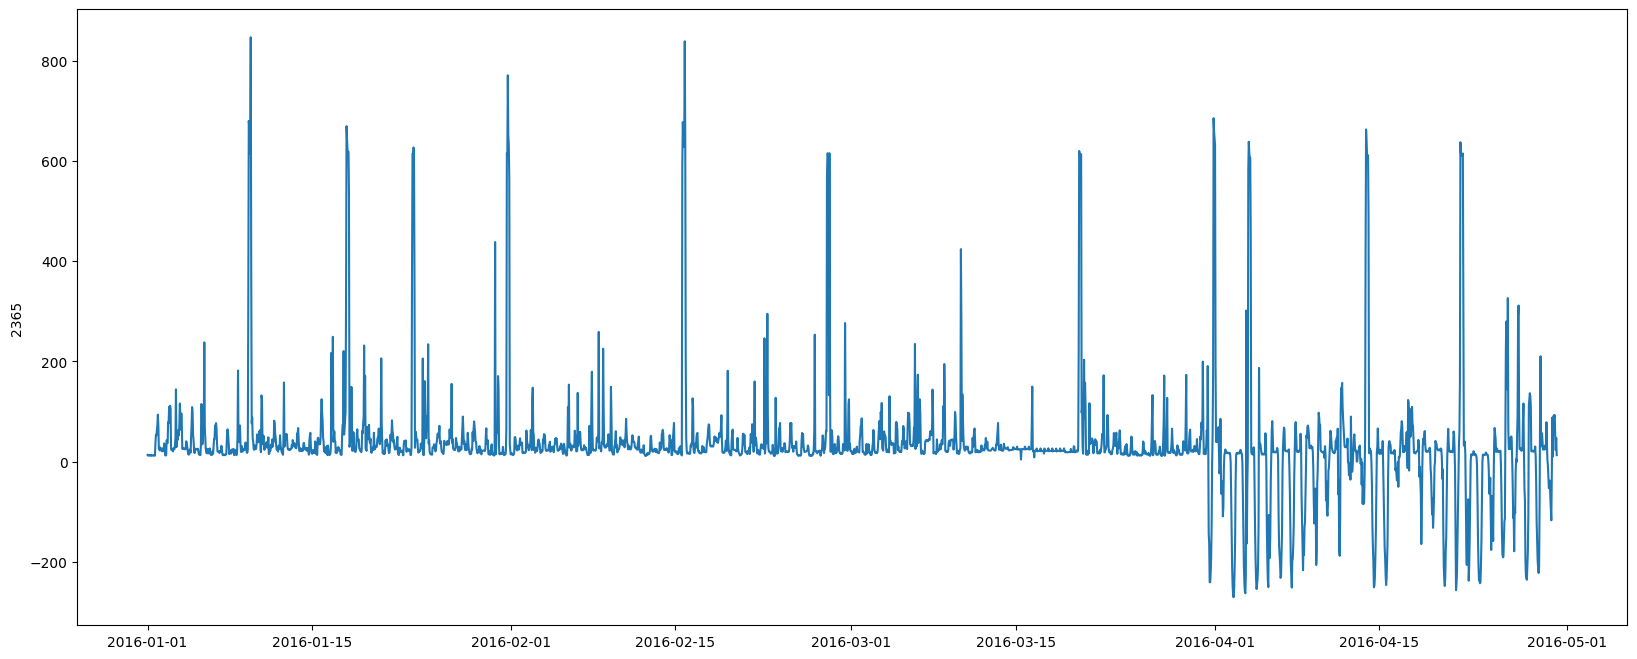

In [31]:
# check user 2365
plot_user_data(hourly_data,'2365')

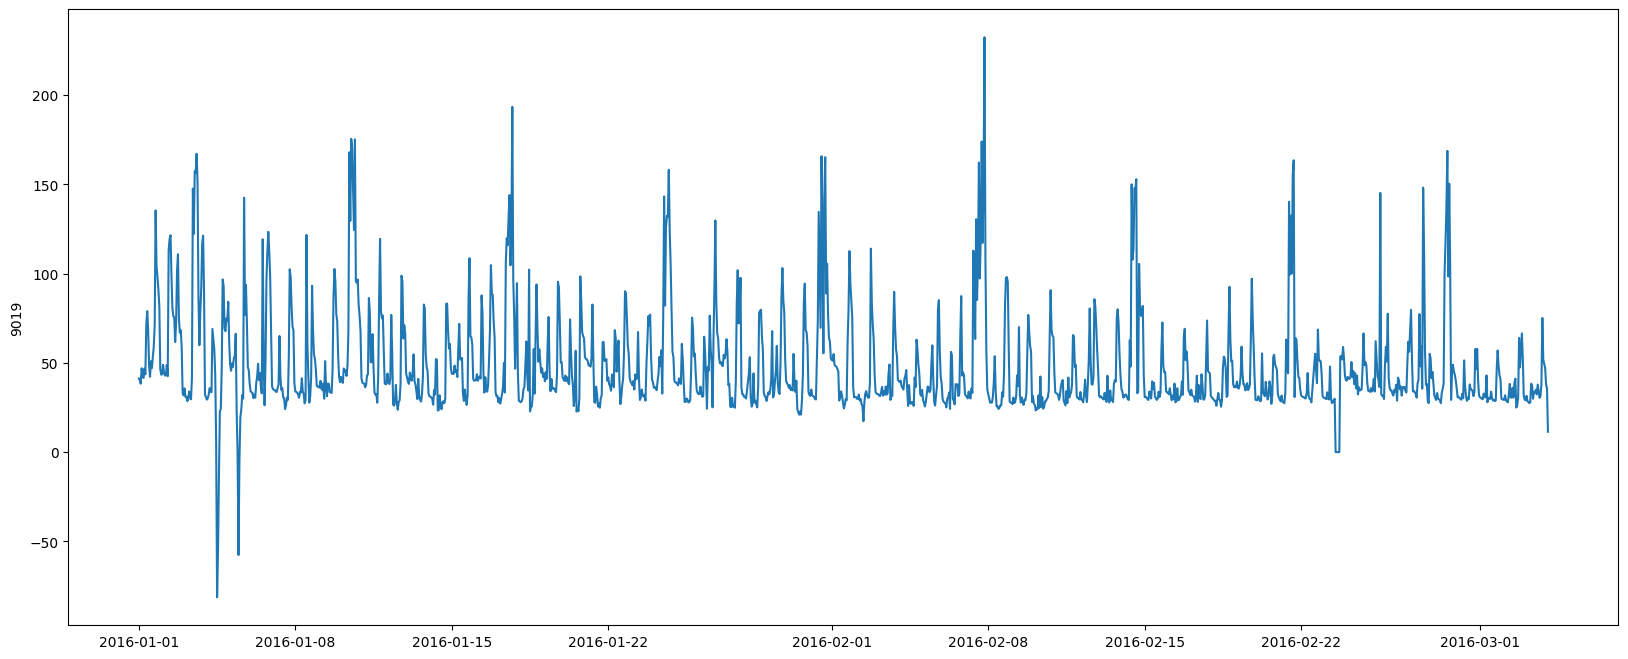

In [32]:
# user 9019
plot_user_data(hourly_data,'9019')

* User 2365 has large amount of negative data, starting from April, 2016. It is also observed that after initial appearance of negative data, the usage pattern still exhibits periodic time series behavior. Therefore, we deem that user 2365 is cheating, and the data will be manually corrected. 

* The rest users with few negative data may be considered as accidents. Apply truncation at zero is enough.

In [33]:
hourly_data['2365']

2016-01-01 00:00:00    13.210938
2016-01-01 01:00:00    11.812500
2016-01-01 02:00:00    13.101562
2016-01-01 03:00:00    13.015625
2016-01-01 04:00:00    11.671875
                         ...    
2016-04-30 01:00:00    22.765625
2016-04-30 02:00:00    47.187500
2016-04-30 03:00:00    12.703125
2016-04-30 04:00:00          NaN
2016-04-30 05:00:00          NaN
Name: 2365, Length: 2886, dtype: float16

In [34]:
# user 2365 started cheating on 2016-3-31
hourly_data['2365'][hourly_data['2365']<0]

2016-03-31 11:00:00   -143.87500
2016-03-31 12:00:00   -162.50000
2016-03-31 13:00:00   -241.00000
2016-03-31 14:00:00   -240.62500
2016-03-31 15:00:00   -223.75000
                         ...    
2016-04-29 13:00:00    -38.15625
2016-04-29 14:00:00    -72.62500
2016-04-29 15:00:00    -93.50000
2016-04-29 16:00:00   -117.37500
2016-04-29 17:00:00    -26.90625
Name: 2365, Length: 267, dtype: float16

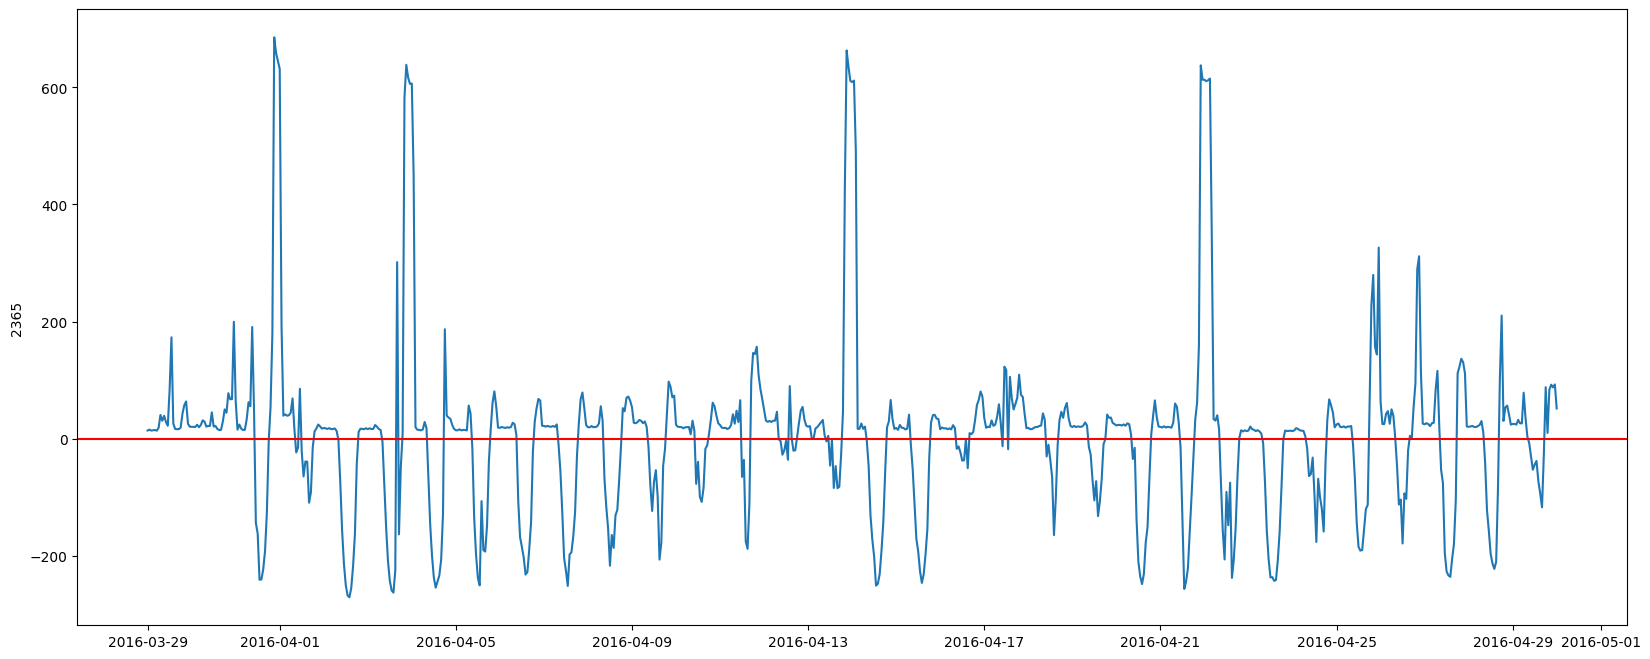

In [35]:
# take a closer look at the negative consumption data
tmp = hourly_data.loc[pd.date_range(start="2016-03-29 00:00:00",end="2016-04-30 00:00:00",freq='60min'),]
plot_user_data(tmp,'2365')
plt.axhline(0, color='r')

In [36]:
# lowest value = -271
hourly_data['2365'][hourly_data['2365']<0].sort_values()

2016-04-02 14:00:00   -271.000000
2016-04-02 13:00:00   -268.000000
2016-04-03 14:00:00   -263.000000
2016-04-03 13:00:00   -259.500000
2016-04-21 13:00:00   -256.750000
                          ...    
2016-04-12 08:00:00     -1.309570
2016-04-26 17:00:00     -0.953125
2016-04-23 19:00:00     -0.760742
2016-04-16 14:00:00     -0.729980
2016-04-19 18:00:00     -0.683594
Name: 2365, Length: 267, dtype: float16

In [37]:
# we shift the data above by +271 so that all the value are nonnegative
# start from 2016-03-31 11:00:00  -143.875000
idx = pd.date_range(start="2016-03-31 11:00:00",end="2016-04-30 05:00:00",freq='60min')
shited_data = 271 + hourly_data.loc[idx,'2365']
hourly_data.loc[idx,'2365'] = shited_data
print(shited_data.min())

0.0


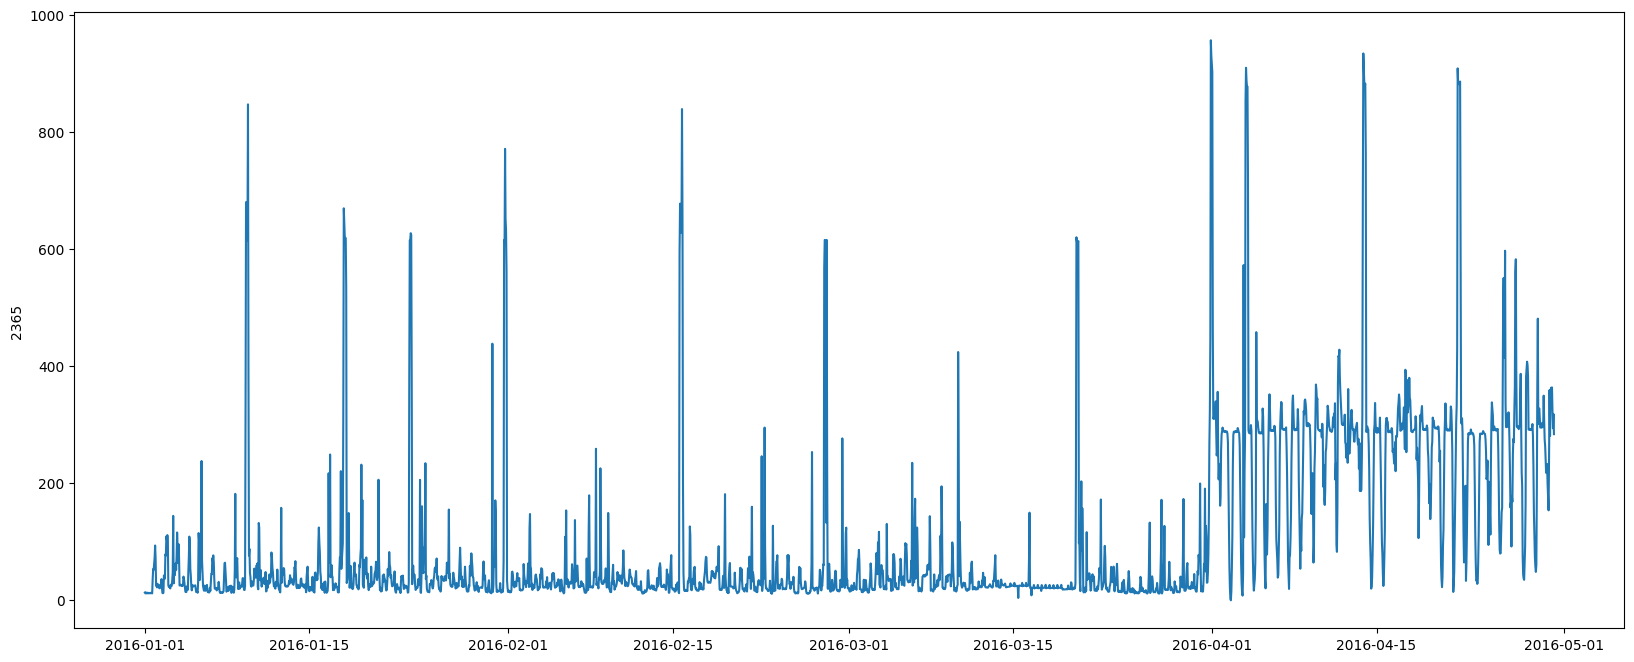

In [38]:
# check data after shifting
plot_user_data(hourly_data,'2365')

In [39]:
# truncate other negative data to zero
hourly_data[hourly_data<0] = 0
hourly_data[hourly_data<0].sum().sum()

0.0

### check zero data

In [40]:
# proportion of zero data (eliminate the missing value)
zero_portion = hourly_data.apply(lambda x:sum(x==0)/(len(x)-x.isna().sum()) ,axis=0).sort_values(ascending=False)
zero_portion[zero_portion>0]

7017    1.000000
4830    1.000000
2510    1.000000
2461    1.000000
668     0.722800
6191    0.689980
1714    0.154300
3953    0.096080
9206    0.087186
9613    0.060106
7504    0.022022
2814    0.017690
781     0.011438
1463    0.007631
4670    0.005199
9019    0.003963
4031    0.002426
2769    0.001734
1642    0.001386
4957    0.001040
2641    0.000694
3736    0.000693
2365    0.000347
4601    0.000347
1632    0.000347
dtype: float64

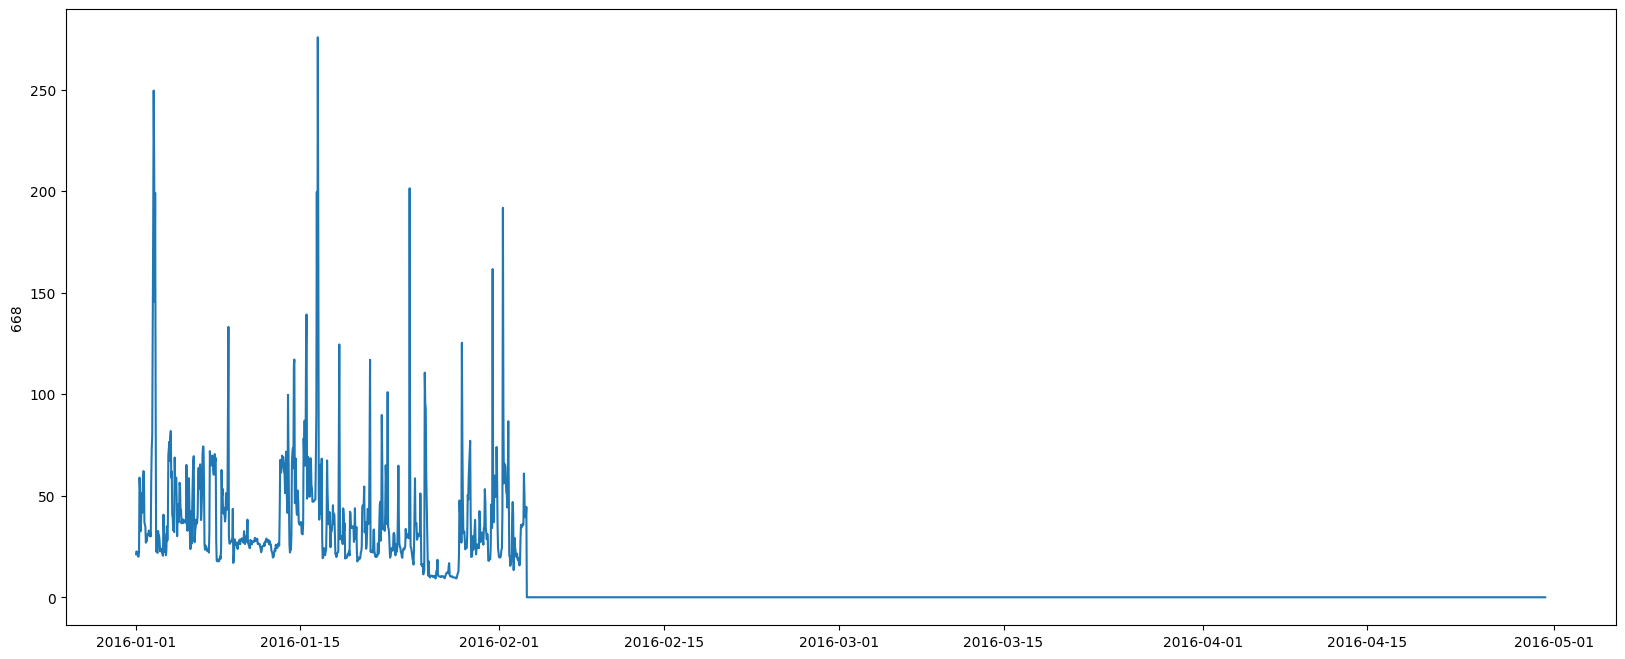

In [41]:
plot_user_data(hourly_data,'668')

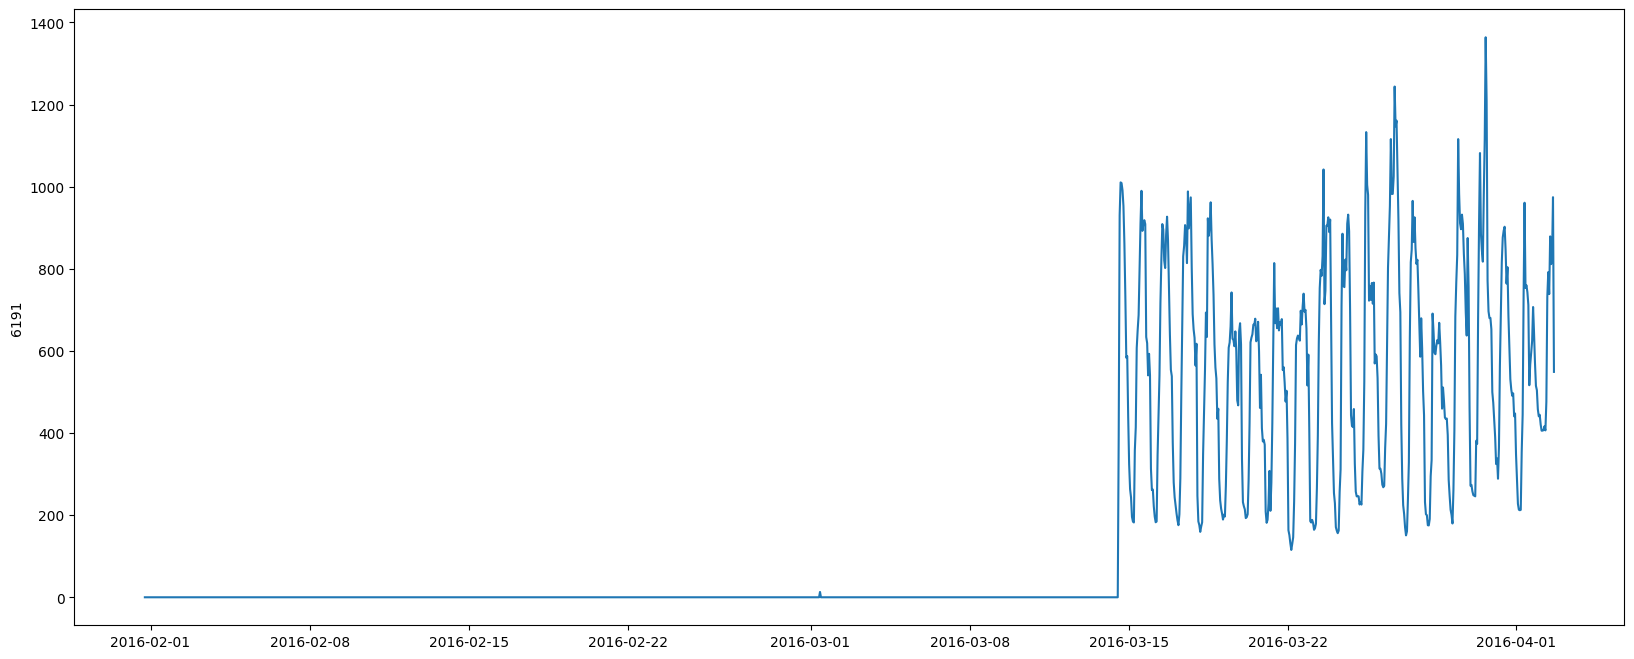

In [42]:
plot_user_data(hourly_data,'6191')

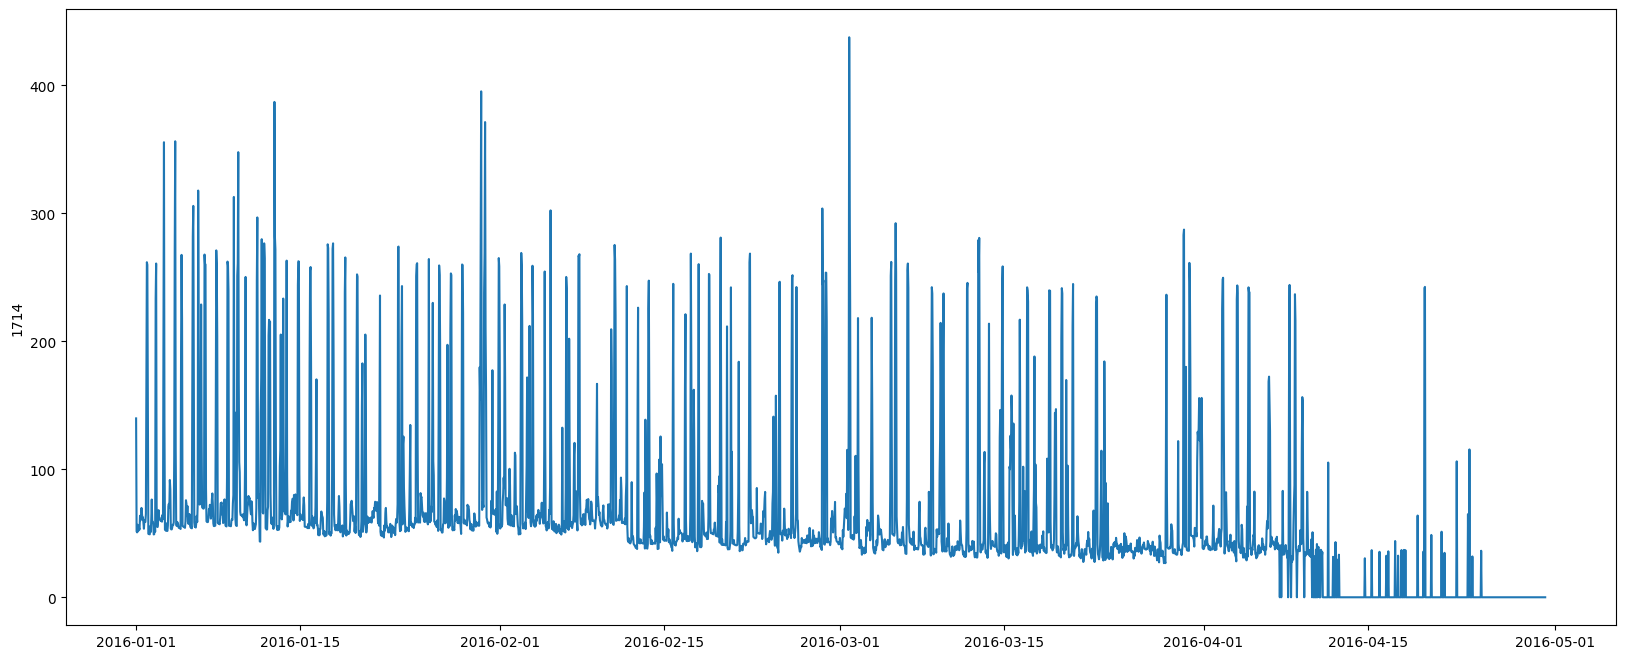

In [43]:
plot_user_data(hourly_data,'1714')

* users of all zero data are considered to be outliers. remove them.
* user 668, 6191 have continuous zero values. We are not sure about the cause of such phenomenem (i.e., cheating or leaving home with the meter on), therefore we should use only non-zero values when computing their load profile.
* the rest has low zero portion. we consider it common and leave it there.

In [44]:
# drop all-zero value users
hourly_data = hourly_data.drop(zero_portion[zero_portion==1].index.tolist(), axis=1)

In [45]:
def f(x):
    if x == 0:
        return np.nan
    else:
        return x
hourly_data[['668','6191']] = hourly_data[['668','6191']].applymap(f)    # applymap: apply elementwise

In [46]:
(hourly_data[['668','6191']]==0).sum()

668     0
6191    0
dtype: int64

In [47]:
hourly_data['hour'] = [datetime.strftime(t,"%H") for t in hourly_data.index.tolist()]

We have done cleaning the abnormal values. Now we can start creating the dataframe for clustering analysis

## compute user load profile 

We would like to compute the daily load profile (24 dimensions/features for each user). By averaging the hourly consumptions over days, we can roughly obtain the electricity daily usage pattern per user.

There are two types of NA data:
* scattered among numerical values. -- no consumption, set zero. included in the computation.
* NA after the end date. This means the user no longer consume the electricity. -- not included in the computation.

In [48]:
# find the start and end time
def find_start_end(data): 
    na_bool = data.isna()
    # find start
    for i in range(len(na_bool)):
        if na_bool[i] == True:
            continue
        else:
            #print('starts at position '+str(i), data.index[i])
            start = i
            break
    # find end  
    for j in reversed(range(len(na_bool))):
        if na_bool[j] == True:
            continue
        else:
            #print('ends at position '+str(j), data.index[j])
            end = j
            break
    return start, end

In [49]:
# algorithm to compute user load profile
profile = pd.DataFrame()   # user profile dataframe. shape = (24, number of users)
user_id = hourly_data.columns.tolist()
for u in user_id[:-1]:
    tmp = hourly_data.loc[:,u]
    start, end = find_start_end(tmp)
    tmp = pd.concat([tmp,hourly_data['hour']],axis=1)
    tmp = tmp.iloc[start:(end+1)]   # exclude NA data after ending date
    tmp = tmp.fillna(0)
    hourly = tmp.groupby(by='hour').agg('mean')
    profile = pd.concat([profile,hourly],axis=1)

In [50]:
profile

,26,59,86,114,370,379,115,77,93,171,...,8218,9343,8395,9160,8419,9937,8555,9434,9912,9771
hour,,,,,,,,,,,,,,,,,,,,,
00,44.656250,48.81250,26.421875,29.000000,65.37500,77.62500,17.906250,55.31250,34.750000,21.031250,...,21.921875,29.359375,15.375000,16.828125,90.37500,20.359375,30.484375,30.828125,16.125000,47.65625
01,34.218750,51.43750,24.562500,29.140625,46.00000,64.62500,18.671875,54.21875,30.890625,20.265625,...,20.203125,28.890625,14.539062,14.054688,91.75000,16.703125,27.031250,27.734375,18.234375,43.12500
02,28.765625,54.03125,25.375000,37.281250,37.43750,55.34375,23.375000,53.15625,30.046875,19.656250,...,20.203125,30.500000,14.640625,14.078125,85.75000,16.093750,24.921875,28.359375,16.984375,42.68750
03,27.875000,57.31250,25.734375,55.750000,37.46875,52.56250,21.125000,55.84375,29.015625,19.609375,...,19.812500,27.765625,14.492188,14.343750,83.43750,16.000000,22.671875,29.593750,20.750000,42.84375
04,27.171875,59.53125,27.500000,103.312500,36.46875,53.40625,24.718750,57.75000,31.578125,19.562500,...,20.031250,25.765625,14.632812,14.921875,96.00000,16.062500,21.421875,27.843750,20.390625,43.21875
05,26.953125,62.09375,27.718750,55.156250,35.15625,95.68750,22.265625,60.40625,30.359375,28.250000,...,21.937500,26.453125,29.406250,15.429688,100.56250,16.156250,21.515625,30.281250,22.187500,47.31250
06,37.312500,69.62500,41.906250,34.593750,38.56250,90.18750,27.281250,94.37500,30.234375,39.031250,...,24.953125,25.781250,41.625000,18.765625,95.12500,18.875000,21.296875,55.531250,25.375000,126.12500
07,50.593750,97.12500,68.812500,52.343750,46.53125,92.06250,26.421875,105.62500,34.531250,34.468750,...,29.453125,25.593750,29.656250,29.250000,109.56250,25.468750,22.031250,57.937500,27.390625,124.00000
08,38.843750,106.06250,70.625000,40.000000,57.68750,55.50000,26.968750,105.25000,35.750000,35.500000,...,28.859375,26.296875,23.687500,35.312500,65.81250,31.625000,24.281250,87.187500,37.500000,95.93750


In [51]:
(profile==0).sum().sum()

0

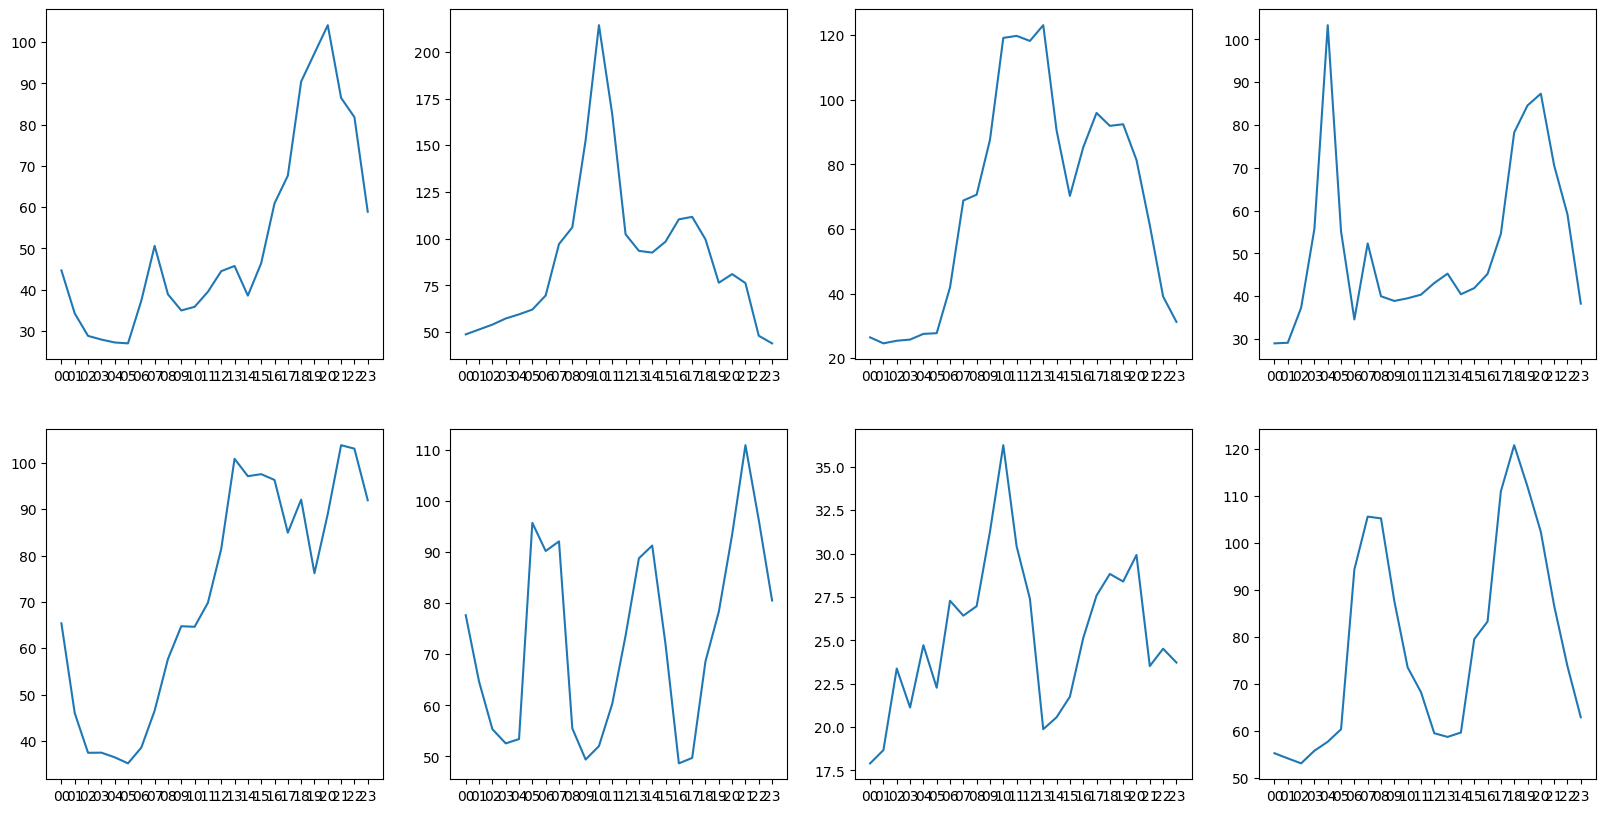

In [52]:
# examine some usage patterns
fig = plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.plot(profile.iloc[:,i])

In [53]:
profile.to_pickle('profile.pkl')

In [54]:
hourly_data.to_pickle('hourly_data.pkl')